In [18]:
import pymysql
import numpy as np
from scipy.stats import chi2_contingency

# 데이터베이스 연결
conn = pymysql.connect(host=host, user=user, password=password, database=database)
cursor = conn.cursor()

# SQL 쿼리 실행
query = """
SELECT p.`gu`, p.`2021` AS 주민등록세대수, m.`2021` AS 신혼부부수
FROM `시군구_별_주민등록세대수` AS p
JOIN `시군구_초혼_신혼부부` AS m ON p.`gu` = m.`gu`
"""

cursor.execute(query)
results = cursor.fetchall()

# 데이터 추출
data = []
for row in results:
    gu, 주민등록세대수, 신혼부부수 = row
    proportion = (신혼부부수 / 주민등록세대수) * 100
    data.append((gu, 주민등록세대수, 신혼부부수, proportion))

# 카이제곱 검정 수행
observed_values = [[row[2]] for row in data]
chi2, p_value, _, _ = chi2_contingency(observed_values)

# 전체 데이터에 대한 기대비중 계산
total_population = sum([row[1] for row in data])
total_newlywed_couples = sum([row[2] for row in data])
expected_proportion = (total_newlywed_couples / total_population) * 100

# 결과 출력
print("구이름\t주민등록세대수(2021)\t신혼부부수(2021)\t신혼부부비중(2021)\t기대비중(2021)\tp-value\t가설검증")
for i in range(len(data)):
    gu, 주민등록세대수, 신혼부부수, proportion = data[i]
    significant = "유의미" if p_value < 0.05 else "유의미하지 않음"
    print(f"{gu}\t{주민등록세대수}\t\t\t{신혼부부수}\t\t\t{proportion:.2f}%\t\t\t{expected_proportion:.2f}%\t\t{p_value:.4f}\t\t{significant}")

# 연결 종료
cursor.close()
conn.close()


구이름	주민등록세대수(2021)	신혼부부수(2021)	신혼부부비중(2021)	기대비중(2021)	p-value	가설검증
종로구	73494			1851			2.52%			3.98%		1.0000		유의미하지 않음
중구	63519			2421			3.81%			3.98%		1.0000		유의미하지 않음
용산구	111036			4622			4.16%			3.98%		1.0000		유의미하지 않음
성동구	134233			6754			5.03%			3.98%		1.0000		유의미하지 않음
동대문구	168219			5839			3.47%			3.98%		1.0000		유의미하지 않음
중랑구	185712			7444			4.01%			3.98%		1.0000		유의미하지 않음
성북구	195017			7371			3.78%			3.98%		1.0000		유의미하지 않음
도봉구	138656			4340			3.13%			3.98%		1.0000		유의미하지 않음
노원구	217378			8524			3.92%			3.98%		1.0000		유의미하지 않음
은평구	214711			8497			3.96%			3.98%		1.0000		유의미하지 않음
서대문구	143647			5294			3.69%			3.98%		1.0000		유의미하지 않음
마포구	179861			7505			4.17%			3.98%		1.0000		유의미하지 않음
양천구	181404			6498			3.58%			3.98%		1.0000		유의미하지 않음
강서구	271175			12055			4.45%			3.98%		1.0000		유의미하지 않음
구로구	180929			8548			4.72%			3.98%		1.0000		유의미하지 않음
영등포구	187020			9412			5.03%			3.98%		1.0000		유의미하지 않음
동작구	184812			7032			3.80%			3.98%		1.0000		유의미하지 않음
관악구	276597			7389			2.67%			3.98%		1.0000		유의미하지

In [55]:
import pymysql

# 데이터베이스 연결
conn = pymysql.connect(host=host, user=user, password=password, database=database)
cursor = conn.cursor()

# SQL 쿼리 실행
query = """
SELECT gu, 2021_amount / 2021_number AS per_capita_amount
FROM 근로소득_연말정산
WHERE gu LIKE '%구'
ORDER BY per_capita_amount DESC
"""

cursor.execute(query)
results = cursor.fetchall()

# 결과 출력 - 상위 3개 구
print("상위 3개 구 - 1인당 연말정산금액")
print("구이름\t\t1인당 연말정산금액")
for row in results[:3]:
    gu, per_capita_amount = row
    print(f"{gu}\t\t{per_capita_amount:.2f}")

# 결과 출력 - 하위 3개 구
print("\n하위 3개 구 - 1인당 연말정산금액")
print("구이름\t\t1인당 연말정산금액")
for row in results[-3:]:
    gu, per_capita_amount = row
    print(f"{gu}\t\t{per_capita_amount:.2f}")

# 연결 종료
cursor.close()
conn.close()


상위 3개 구 - 1인당 연말정산금액
구이름		1인당 연말정산금액
강남구		81.05
서초구		80.51
용산구		69.80

하위 3개 구 - 1인당 연말정산금액
구이름		1인당 연말정산금액
중랑구		32.82
금천구		32.51
강북구		31.04


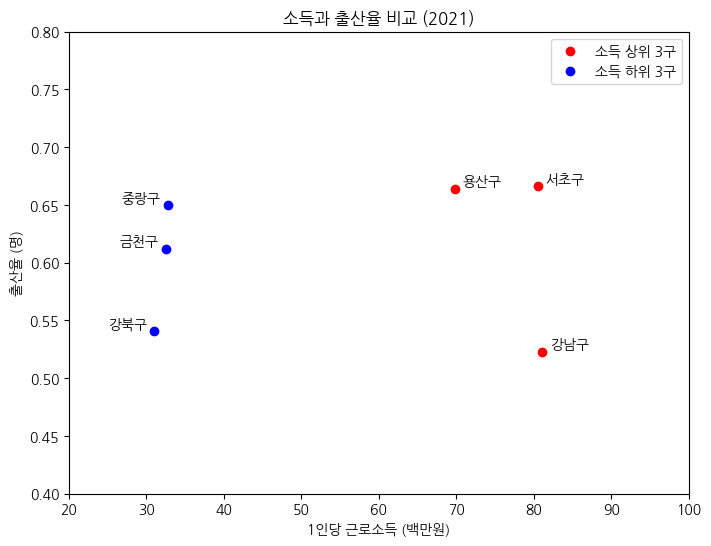

소득이 가장 높은 구와 출산율의 상관계수: nan
소득이 가장 낮은 구와 출산율의 상관계수: nan
전체 그룹의 상관계수: -0.07168555261427374


C:\Users\redwi\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\redwi\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [241]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "NanumGothic"

# 데이터 준비
income_data = pd.read_csv('구별_2021_1인당_근로소득.csv')
marriagerate_data = pd.read_csv('구별_합계출산율.csv')

# 데이터 순서를 맞추기 위해 구이름을 기준으로 정렬
income_data = income_data.sort_values('구이름')
marriagerate_data = marriagerate_data.sort_values('구이름')

# 소득이 가장 높은 구 3개와 가장 낮은 구 3개 추출
top_income_districts = income_data.nlargest(3, '2021')['구이름']
bottom_income_districts = income_data.nsmallest(3, '2021')['구이름']

# 소득이 가장 높은 구 3개와 가장 낮은 구 3개의 출산율 추출
top_income_marriagerates = marriagerate_data[marriagerate_data['구이름'].isin(top_income_districts)]['2021']
bottom_income_marriagerates = marriagerate_data[marriagerate_data['구이름'].isin(bottom_income_districts)]['2021']

# 시각화 - 출산율과 소득의 관계 분석
plt.figure(figsize=(8, 6))
plt.scatter(income_data.loc[income_data['구이름'].isin(top_income_districts), '2021'], top_income_marriagerates, c='red', label='소득 상위 3구')
plt.scatter(income_data.loc[income_data['구이름'].isin(bottom_income_districts), '2021'], bottom_income_marriagerates, c='blue', label='소득 하위 3구')
plt.xlabel('1인당 근로소득 (백만원)')
plt.ylabel('출산율 (명)')
plt.legend()
plt.title('소득과 출산율 비교 (2021)')
plt.xlim(20, 100)
plt.ylim(0.4, 0.8)  # y축 범위 설정

# 각 점 옆에 구이름 표시
for district in top_income_districts:
    x = income_data.loc[income_data['구이름'] == district, '2021'].values[0]
    y = marriagerate_data.loc[marriagerate_data['구이름'] == district, '2021'].values[0]
    plt.text(x+1, y, district, ha='left', va='bottom')

for district in bottom_income_districts:
    x = income_data.loc[income_data['구이름'] == district, '2021'].values[0]
    y = marriagerate_data.loc[marriagerate_data['구이름'] == district, '2021'].values[0]
    plt.text(x-1, y, district, ha='right', va='bottom')

plt.show()

# 개별 그룹 간 상관계수 계산
top_income_correlation = top_income_marriagerates.corr(income_data.loc[income_data['구이름'].isin(top_income_districts), '2021'])
bottom_income_correlation = bottom_income_marriagerates.corr(income_data.loc[income_data['구이름'].isin(bottom_income_districts), '2021'])

# 전체 그룹 상관계수 계산
all_district_correlation = marriagerate_data['2021'].corr(income_data['2021'])

# 상관계수 출력
print("소득이 가장 높은 구와 출산율의 상관계수:", top_income_correlation)
print("소득이 가장 낮은 구와 출산율의 상관계수:", bottom_income_correlation)
print("전체 그룹의 상관계수:", all_district_correlation)


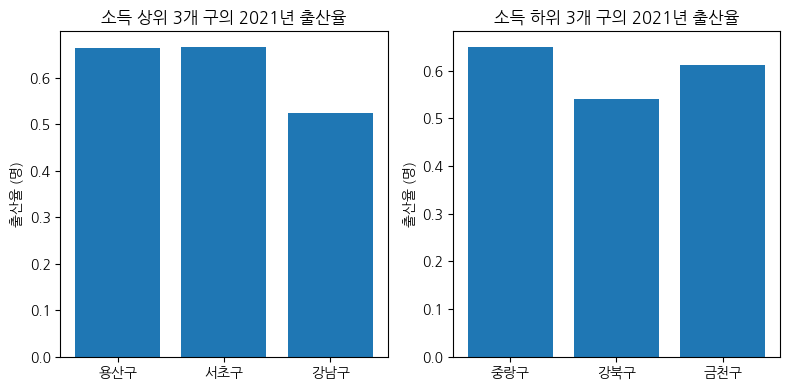

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
birthrate_data = pd.read_csv('구별_합계출산율.csv')
income_data = pd.read_csv('구별_2021_1인당_근로소득.csv')

# 상위 3개 구와 하위 3개 구 추출
top_income_districts = income_data.nlargest(3, '2021').sort_values('2021')['구이름']
bottom_income_districts = income_data.nsmallest(3, '2021').sort_values('2021')['구이름']

# 상위 3개 구와 하위 3개 구의 출산율 추출
top_income_birthrates = birthrate_data[birthrate_data['구이름'].isin(top_income_districts)][['구이름', '2021']]
bottom_income_birthrates = birthrate_data[birthrate_data['구이름'].isin(bottom_income_districts)][['구이름', '2021']]

# 플롯 설정
plt.figure(figsize=(8, 4))

# 상위 3개 구 출산율 플롯
plt.subplot(1, 2, 1)
plt.bar(top_income_birthrates['구이름'], top_income_birthrates['2021'])
plt.ylabel('출산율 (명)')
plt.title('소득 상위 3개 구의 2021년 출산율')

# 하위 3개 구 출산율 플롯
plt.subplot(1, 2, 2)
plt.bar(bottom_income_birthrates['구이름'], bottom_income_birthrates['2021'])
plt.ylabel('출산율 (명)')
plt.title('소득 하위 3개 구의 2021년 출산율')

plt.tight_layout()
plt.show()


        구분    출산율 평균  출산율 중앙값
0  상위 3개 구  0.617667    0.664
1  하위 3개 구  0.601000    0.612


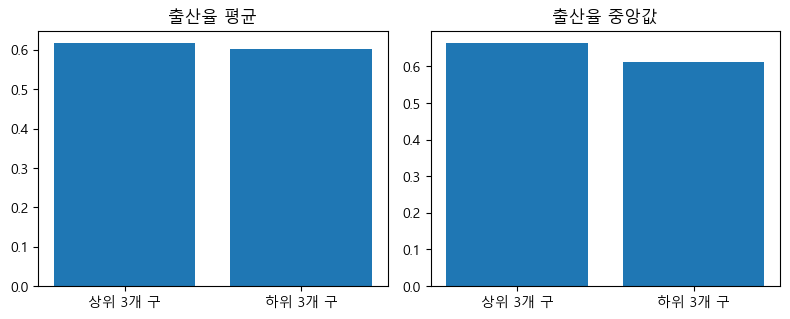

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
income_data = pd.read_csv('구별_2021_1인당_근로소득.csv')
birthrate_data = pd.read_csv('구별_합계출산율.csv')

# 소득이 가장 높은 구와 가장 낮은 구 추출
top_income_districts = income_data.nlargest(3, '2021')['구이름']
bottom_income_districts = income_data.nsmallest(3, '2021')['구이름']

# 소득이 가장 높은 구와 가장 낮은 구의 출산율 추출
top_income_birthrates = birthrate_data[birthrate_data['구이름'].isin(top_income_districts)]['2021']
bottom_income_birthrates = birthrate_data[birthrate_data['구이름'].isin(bottom_income_districts)]['2021']

# 출산율 통계량 계산
top_income_stats = top_income_birthrates.describe()
bottom_income_stats = bottom_income_birthrates.describe()

# 표 생성
data = {
    '구분': ['상위 3개 구', '하위 3개 구'],
    '출산율 평균': [top_income_stats['mean'], bottom_income_stats['mean']],
    '출산율 중앙값': [top_income_stats['50%'], bottom_income_stats['50%']]
}

df = pd.DataFrame(data)

# 출력
print(df)

# 시각화
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.bar(df['구분'], df['출산율 평균'])
plt.title('출산율 평균')

plt.subplot(2, 2, 2)
plt.bar(df['구분'], df['출산율 중앙값'])
plt.title('출산율 중앙값')

plt.tight_layout()
plt.show()


In [83]:
import pandas as pd

# 데이터 준비
income_data = pd.read_csv('구별_2021_1인당_근로소득.csv')
birthrate_data = pd.read_csv('구별_합계출산율.csv')

# 소득이 가장 높은 구와 가장 낮은 구 추출
top_income_districts = income_data.nlargest(3, '2021')['구이름']
bottom_income_districts = income_data.nsmallest(3, '2021')['구이름']

# 소득이 가장 높은 구와 가장 낮은 구의 출산율 추출
top_income_birthrates = birthrate_data[birthrate_data['구이름'].isin(top_income_districts)]['2021']
bottom_income_birthrates = birthrate_data[birthrate_data['구이름'].isin(bottom_income_districts)]['2021']

# 평균, 중앙값, 표준편차 계산
top_income_mean = top_income_birthrates.mean()
top_income_median = top_income_birthrates.median()
top_income_std = top_income_birthrates.std()

bottom_income_mean = bottom_income_birthrates.mean()
bottom_income_median = bottom_income_birthrates.median()
bottom_income_std = bottom_income_birthrates.std()

# 결과 출력
print("소득이 가장 높은 구의 출산율 평균:", top_income_mean)
print("소득이 가장 높은 구의 출산율 중앙값:", top_income_median)
print("소득이 가장 높은 구의 출산율 표준편차:", top_income_std)

print("소득이 가장 낮은 구의 출산율 평균:", bottom_income_mean)
print("소득이 가장 낮은 구의 출산율 중앙값:", bottom_income_median)
print("소득이 가장 낮은 구의 출산율 표준편차:", bottom_income_std)


소득이 가장 높은 구의 출산율 평균: 0.6176666666666667
소득이 가장 높은 구의 출산율 중앙값: 0.664
소득이 가장 높은 구의 출산율 표준편차: 0.08198983676854915
소득이 가장 낮은 구의 출산율 평균: 0.601
소득이 가장 낮은 구의 출산율 중앙값: 0.612
소득이 가장 낮은 구의 출산율 표준편차: 0.055326304774492206


[상위 3구의 회귀분석 결과]
                            OLS Regression Results                            
Dep. Variable:              birthrate   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                 -0.447
Method:                 Least Squares   F-statistic:                    0.3826
Date:                Mon, 05 Jun 2023   Prob (F-statistic):              0.647
Time:                        23:33:58   Log-Likelihood:                -8.7057
No. Observations:                   3   AIC:                             21.41
Df Residuals:                       1   BIC:                             19.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.2660     40.889   

C:\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


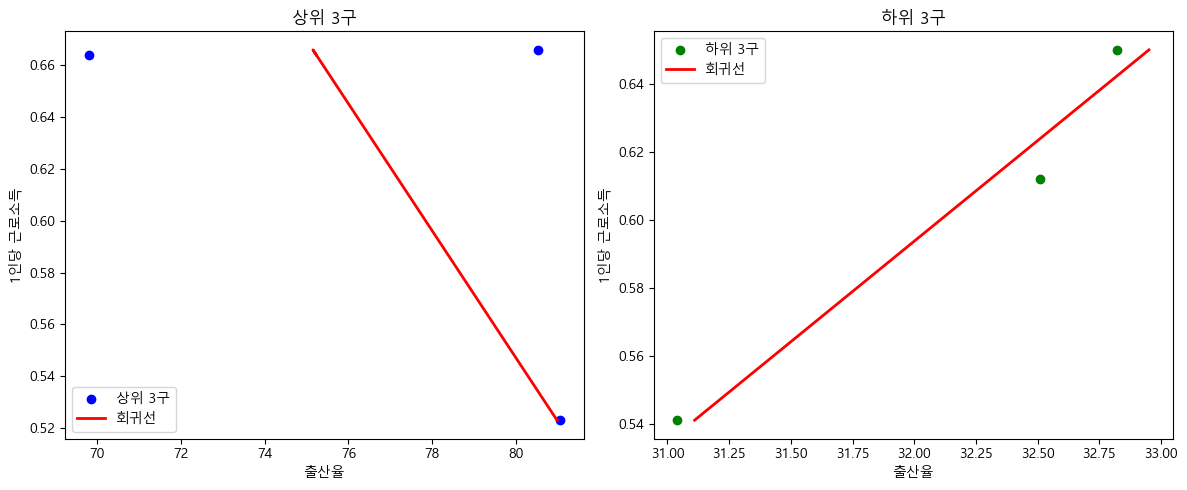

In [190]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

# 2021년 소득 데이터 파일 불러오기
df_income = pd.read_csv('구별_2021_1인당_근로소득.csv', encoding='utf-8')

# 2021년 출산율 데이터 파일 불러오기
df_birthrate = pd.read_csv('구별_합계출산율.csv', encoding='utf-8')

# 서울시 25개구 중 상 3구와 하위 3구의 이름 리스트를 생성
HIGH_INCOME_DISTRICTS = df_income.nlargest(3, '2021')['구이름'].tolist()
LOW_INCOME_DISTRICTS = df_income.nsmallest(3, '2021')['구이름'].tolist()

# 필요한 데이터만 추출 DataFrame 생성
df_high_income = df_income[df_income['구이름'].isin(HIGH_INCOME_DISTRICTS)]
df_low_income = df_income[df_income['구이름'].isin(LOW_INCOME_DISTRICTS)]
df_high_birthrate = df_birthrate[df_birthrate['구이름'].isin(HIGH_INCOME_DISTRICTS)]
df_low_birthrate = df_birthrate[df_birthrate['구이름'].isin(LOW_INCOME_DISTRICTS)]

# Merge the datasets with the renamed column
df_high = pd.merge(df_high_income, df_high_birthrate[['구이름', '2021']], on='구이름')
df_low = pd.merge(df_low_income, df_low_birthrate[['구이름', '2021']], on='구이름')

# Rename the '2021' column to a valid variable name and add 'income' column
df_high = df_high.rename(columns={'2021_x': 'birthrate'})
df_high['income'] = df_high['2021_y']
df_low = df_low.rename(columns={'2021_x': 'birthrate'})
df_low['income'] = df_low['2021_y']

# Run regression analysis
model_high = ols("birthrate ~ 1 + income", data=df_high).fit()
model_low = ols("birthrate ~ 1 + income", data=df_low).fit()

# 회귀분석 결과 출력하기
print("[상위 3구의 회귀분석 결과]")
print(model_high.summary())
print("\n[하위 3구의 회귀분석 결과]")
print(model_low.summary())

# 유의수준 0.05 이하이면 유의하다고 판단
if model_high.pvalues['income'] < 0.05:
    print("상위 3구에서는 소득과 출산율 간에 유의한 상관관계가 있습니다.")
else:
    print("상위 3구에서는 소득과 출산율 간에 유의한 상관관계가 없습니다.")

if model_low.pvalues['income'] < 0.05:
    print("하위 3구에서는 소득과 출산율 간에 유의한 상관관계가 있습니다.")
else:
    print("하위 3구에서는 소득과 출산율 간에 유의한 상관관계가 없습니다.")

import matplotlib.pyplot as plt


# 산점도와 회귀선 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 상위 3구 산점도와 회귀선
ax1.scatter(df_high['birthrate'], df_high['income'], color='blue', label='상위 3구')
ax1.plot(model_high.fittedvalues, df_high['income'], color='red', linewidth=2, label='회귀선')
ax1.set_xlabel('출산율')
ax1.set_ylabel('1인당 근로소득')
ax1.set_title('상위 3구')
ax1.legend()

# 하위 3구 산점도와 회귀선
ax2.scatter(df_low['birthrate'], df_low['income'], color='green', label='하위 3구')
ax2.plot(model_low.fittedvalues, df_low['income'], color='red', linewidth=2, label='회귀선')
ax2.set_xlabel('출산율')
ax2.set_ylabel('1인당 근로소득')
ax2.set_title('하위 3구')
ax2.legend()

# 그래프 출력
plt.tight_layout()
plt.show()



In [107]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

# 2021년 소득 데이터 파일 불러오기
df_income = pd.read_csv('구별_2021_1인당_근로소득.csv', encoding='utf-8')

# 2021년 출산율 데이터 파일 불러오기
df_birthrate = pd.read_csv('구별_합계출산율.csv', encoding='utf-8')

# 필요한 데이터만 추출 DataFrame 생성
df_merged = pd.merge(df_income, df_birthrate, on='구이름')

# Rename the columns to valid variable names
df_merged = df_merged.rename(columns={'2021_x': 'income', '2021_y': 'birthrate'})

# Run regression analysis
model = ols("birthrate ~ 1 + income", data=df_merged).fit()

# 회귀분석 결과 출력하기
print("[전체 데이터셋의 회귀분석 결과]")
print(model.summary())

# Calculate correlation coefficient
correlation = df_merged['income'].corr(df_merged['birthrate'])
print("전체 데이터셋에서의 상관계수: {:.3f}".format(correlation))

# 유의수준 0.05 이하이면 유의하다고 판단
if model.pvalues['income'] < 0.05:
    print("전체 데이터셋에서 소득과 출산율 간에 유의한 상관관계가 있습니다.")
else:
    print("전체 데이터셋에서 소득과 출산율 간에 유의한 상관관계가 없습니다.")


[전체 데이터셋의 회귀분석 결과]
                            OLS Regression Results                            
Dep. Variable:              birthrate   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                   0.09570
Date:                Mon, 05 Jun 2023   Prob (F-statistic):              0.760
Time:                        02:09:53   Log-Likelihood:                 27.901
No. Observations:                  25   AIC:                            -51.80
Df Residuals:                      23   BIC:                            -49.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6103      0.060 

[전체 데이터셋의 회귀분석 결과]
                            OLS Regression Results                            
Dep. Variable:              birthrate   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                   0.09570
Date:                Tue, 06 Jun 2023   Prob (F-statistic):              0.760
Time:                        01:15:24   Log-Likelihood:                 27.901
No. Observations:                  25   AIC:                            -51.80
Df Residuals:                      23   BIC:                            -49.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6103      0.060 

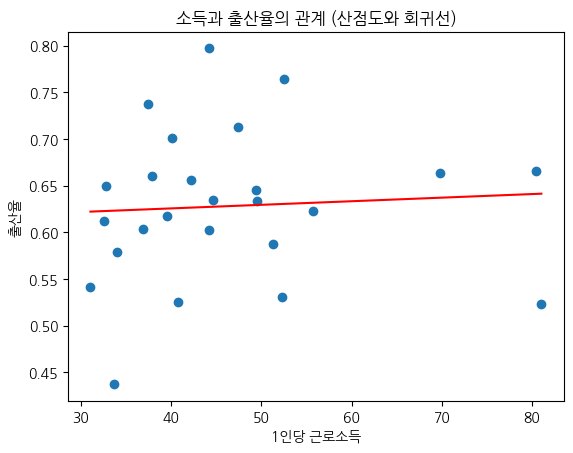

전체 데이터셋에서 소득과 출산율 간에 유의한 상관관계가 없습니다.


In [215]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# 2021년 소득 데이터 파일 불러오기
df_income = pd.read_csv('구별_2021_1인당_근로소득.csv', encoding='utf-8')

# 2021년 출산율 데이터 파일 불러오기
df_birthrate = pd.read_csv('구별_합계출산율.csv', encoding='utf-8')

# 필요한 데이터만 추출 DataFrame 생성
df_merged = pd.merge(df_income, df_birthrate, on='구이름')

# Rename the columns to valid variable names
df_merged = df_merged.rename(columns={'2021_x': 'income', '2021_y': 'birthrate'})

# Run regression analysis
model = ols("birthrate ~ 1 + income", data=df_merged).fit()

# 회귀분석 결과 출력하기
print("[전체 데이터셋의 회귀분석 결과]")
print(model.summary())

# Calculate correlation coefficient
correlation = df_merged['income'].corr(df_merged['birthrate'])
print("전체 데이터셋에서의 상관계수: {:.3f}".format(correlation))

# Scatter plot with regression line
plt.scatter(df_merged['income'], df_merged['birthrate'])
plt.xlabel('1인당 근로소득')
plt.ylabel('출산율')
plt.title('소득과 출산율의 관계 (산점도와 회귀선)')
plt.plot(df_merged['income'], model.predict(df_merged['income']), color='red')
plt.show()

# 유의수준 0.05 이하이면 유의하다고 판단
if model.pvalues['income'] < 0.05:
    print("전체 데이터셋에서 소득과 출산율 간에 유의한 상관관계가 있습니다.")
else:
    print("전체 데이터셋에서 소득과 출산율 간에 유의한 상관관계가 없습니다.")


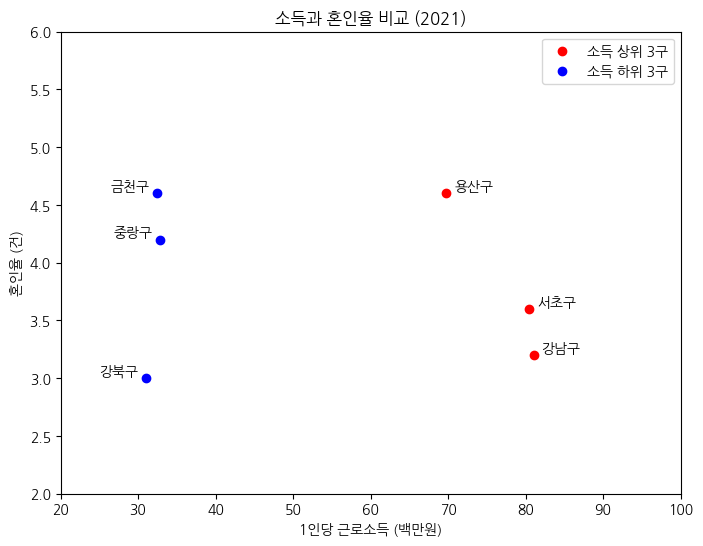

소득이 가장 높은 구와 혼인율의 상관계수: nan
소득이 가장 낮은 구와 혼인율의 상관계수: nan
전체 그룹의 상관계수: 0.05320161022938322


C:\Users\redwi\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\redwi\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [242]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "NanumGothic"

# 데이터 준비
income_data = pd.read_csv('구별_2021_1인당_근로소득.csv')
marriagerate_data = pd.read_csv('구별_조혼인율.csv')

# 데이터 순서를 맞추기 위해 구이름을 기준으로 정렬
income_data = income_data.sort_values('구이름')
marriagerate_data = marriagerate_data.sort_values('구이름')

# 소득이 가장 높은 구 3개와 가장 낮은 구 3개 추출
top_income_districts = income_data.nlargest(3, '2021')['구이름']
bottom_income_districts = income_data.nsmallest(3, '2021')['구이름']

# 소득이 가장 높은 구 3개와 가장 낮은 구 3개의 혼인율 추출
top_income_marriagerates = marriagerate_data[marriagerate_data['구이름'].isin(top_income_districts)]['2021']
bottom_income_marriagerates = marriagerate_data[marriagerate_data['구이름'].isin(bottom_income_districts)]['2021']

# 시각화 - 출산율과 소득의 관계 분석
plt.figure(figsize=(8, 6))
plt.scatter(income_data.loc[income_data['구이름'].isin(top_income_districts), '2021'], top_income_marriagerates, c='red', label='소득 상위 3구')
plt.scatter(income_data.loc[income_data['구이름'].isin(bottom_income_districts), '2021'], bottom_income_marriagerates, c='blue', label='소득 하위 3구')
plt.xlabel('1인당 근로소득 (백만원)')
plt.ylabel('혼인율 (건)')
plt.legend()
plt.title('소득과 혼인율 비교 (2021)')
plt.xlim(20, 100)
plt.ylim(2, 6)  # y축 범위 설정

# 각 점 옆에 구이름 표시
for district in top_income_districts:
    x = income_data.loc[income_data['구이름'] == district, '2021'].values[0]
    y = marriagerate_data.loc[marriagerate_data['구이름'] == district, '2021'].values[0]
    plt.text(x+1, y, district, ha='left', va='bottom')

for district in bottom_income_districts:
    x = income_data.loc[income_data['구이름'] == district, '2021'].values[0]
    y = marriagerate_data.loc[marriagerate_data['구이름'] == district, '2021'].values[0]
    plt.text(x-1, y, district, ha='right', va='bottom')

plt.show()

# 개별 그룹 간 상관계수 계산
top_income_correlation = top_income_marriagerates.corr(income_data.loc[income_data['구이름'].isin(top_income_districts), '2021'])
bottom_income_correlation = bottom_income_marriagerates.corr(income_data.loc[income_data['구이름'].isin(bottom_income_districts), '2021'])

# 전체 그룹 상관계수 계산
all_district_correlation = marriagerate_data['2021'].corr(income_data['2021'])

# 상관계수 출력
print("소득이 가장 높은 구와 혼인율의 상관계수:", top_income_correlation)
print("소득이 가장 낮은 구와 혼인율의 상관계수:", bottom_income_correlation)
print("전체 그룹의 상관계수:", all_district_correlation)


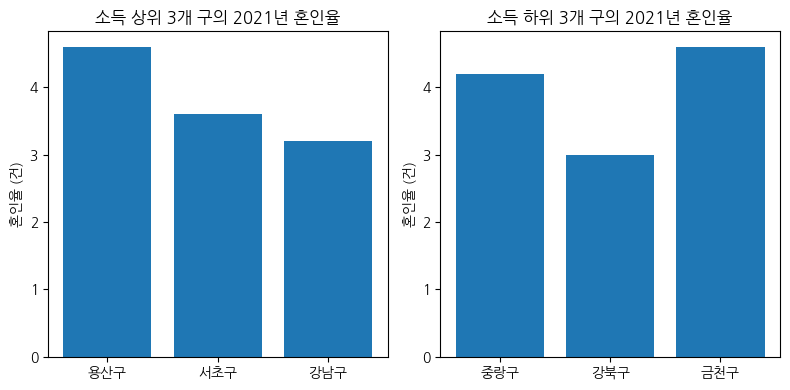

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
marriagerate_data = pd.read_csv('구별_조혼인율.csv')
income_data = pd.read_csv('구별_2021_1인당_근로소득.csv')

# 상위 3개 구와 하위 3개 구 추출
top_income_districts = income_data.nlargest(3, '2021').sort_values('2021')['구이름']
bottom_income_districts = income_data.nsmallest(3, '2021').sort_values('2021')['구이름']

# 상위 3개 구와 하위 3개 구의 출산율 추출
top_income_marriagerates = marriagerate_data[marriagerate_data['구이름'].isin(top_income_districts)][['구이름', '2021']]
bottom_income_marriagerates = marriagerate_data[marriagerate_data['구이름'].isin(bottom_income_districts)][['구이름', '2021']]

# 플롯 설정
plt.figure(figsize=(8, 4))

# 상위 3개 구 출산율 플롯
plt.subplot(1, 2, 1)
plt.bar(top_income_marriagerates['구이름'], top_income_marriagerates['2021'])
plt.ylabel('혼인율 (건)')
plt.title('소득 상위 3개 구의 2021년 혼인율')

# 하위 3개 구 출산율 플롯
plt.subplot(1, 2, 2)
plt.bar(bottom_income_marriagerates['구이름'], bottom_income_marriagerates['2021'])
plt.ylabel('혼인율 (건)')
plt.title('소득 하위 3개 구의 2021년 혼인율')

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

# 데이터 준비
income_data = pd.read_csv('구별_2021_1인당_근로소득.csv')
marriagerate_data = pd.read_csv('구별_조혼인율.csv')

# 소득 상위 3개 구와 하위 3개 구 추출
top_income_districts = income_data.nlargest(3, '2021')[['구이름', '2021']]
bottom_income_districts = income_data.nsmallest(3, '2021')[['구이름', '2021']]

# 출산율 데이터에 소득 데이터 병합
top_income_marriagerates = pd.merge(top_income_districts, marriagerate_data, on='구이름')
bottom_income_marriagerates = pd.merge(bottom_income_districts, marriagerate_data, on='구이름')

# 결과 출력
print("[상위 3개 구의 소득과 혼인율]")
print(top_income_marriagerates)

print("\n[하위 3개 구의 소득과 혼인율]")
print(bottom_income_marriagerates)

[상위 3개 구의 소득과 혼인율]
   구이름  2021_x  2014  2015  2016  2017  2018  2019  2020  2021_y  2022
0  강남구   81.05   6.3   6.0   5.4   4.9   4.7   4.4   3.9     3.2   3.2
1  서초구   80.51   6.5   6.4   6.1   5.2   5.2   4.9   4.4     3.6   3.2
2  용산구   69.80   6.8   6.7   6.2   6.2   6.4   6.0   5.4     4.6   4.4

[하위 3개 구의 소득과 혼인율]
   구이름  2021_x  2014  2015  2016  2017  2018  2019  2020  2021_y  2022
0  강북구   31.04   5.5   5.2   4.6   4.5   4.3   4.1   3.4     3.0   2.9
1  금천구   32.51   6.6   6.3   5.7   6.2   5.5   5.4   5.6     4.6   5.0
2  중랑구   32.82   6.7   6.6   6.4   5.7   5.6   5.2   4.7     4.2   4.5


        구분    혼인율 평균  혼인율 중앙값
0  상위 3개 구  3.800000      3.6
1  하위 3개 구  3.933333      4.2


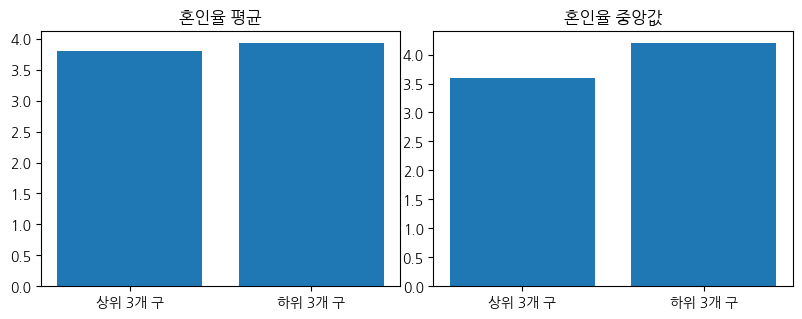

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
income_data = pd.read_csv('구별_2021_1인당_근로소득.csv')
marriagerate_data = pd.read_csv('구별_조혼인율.csv')

# 소득이 가장 높은 구와 가장 낮은 구 추출
top_income_districts = income_data.nlargest(3, '2021')['구이름']
bottom_income_districts = income_data.nsmallest(3, '2021')['구이름']

# 소득이 가장 높은 구와 가장 낮은 구의 출산율 추출
top_income_marriagerates = marriagerate_data[marriagerate_data['구이름'].isin(top_income_districts)]['2021']
bottom_income_marriagerates = marriagerate_data[marriagerate_data['구이름'].isin(bottom_income_districts)]['2021']

# 출산율 통계량 계산
top_income_stats = top_income_marriagerates.describe()
bottom_income_stats = bottom_income_marriagerates.describe()

# 표 생성
data = {
    '구분': ['상위 3개 구', '하위 3개 구'],
    '혼인율 평균': [top_income_stats['mean'], bottom_income_stats['mean']],
    '혼인율 중앙값': [top_income_stats['50%'], bottom_income_stats['50%']]
}

df = pd.DataFrame(data)

# 출력
print(df)

# 시각화
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.bar(df['구분'], df['혼인율 평균'])
plt.title('혼인율 평균')

plt.subplot(2, 2, 2)
plt.bar(df['구분'], df['혼인율 중앙값'])
plt.title('혼인율 중앙값')

plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# 데이터 준비
income_data = pd.read_csv('구별_2021_1인당_근로소득.csv')
marriagerate_data = pd.read_csv('구별_조혼인율.csv')

# 소득이 가장 높은 구와 가장 낮은 구 추출
top_income_districts = income_data.nlargest(3, '2021')['구이름']
bottom_income_districts = income_data.nsmallest(3, '2021')['구이름']

# 소득이 가장 높은 구와 가장 낮은 구의 혼인율 추출
top_income_marriagerates = marriagerate_data[marriagerate_data['구이름'].isin(top_income_districts)]['2021']
bottom_income_marriagerates = marriagerate_data[marriagerate_data['구이름'].isin(bottom_income_districts)]['2021']

# 평균, 중앙값, 표준편차 계산
top_income_mean = top_income_marriagerates.mean()
top_income_median = top_income_marriagerates.median()
top_income_std = top_income_marriagerates.std()

bottom_income_mean = bottom_income_marriagerates.mean()
bottom_income_median = bottom_income_marriagerates.median()
bottom_income_std = bottom_income_marriagerates.std()

# 결과 출력
print("소득이 가장 높은 구의 혼인율 평균:", top_income_mean)
print("소득이 가장 높은 구의 혼인율 중앙값:", top_income_median)
print("소득이 가장 높은 구의 혼인율 표준편차:", top_income_std)

print("소득이 가장 낮은 구의 혼인율 평균:", bottom_income_mean)
print("소득이 가장 낮은 구의 혼인율 중앙값:", bottom_income_median)
print("소득이 가장 낮은 구의 혼인율 표준편차:", bottom_income_std)


소득이 가장 높은 구의 혼인율 평균: 3.7999999999999994
소득이 가장 높은 구의 혼인율 중앙값: 3.6
소득이 가장 높은 구의 혼인율 표준편차: 0.7211102550927976
소득이 가장 낮은 구의 혼인율 평균: 3.9333333333333336
소득이 가장 낮은 구의 혼인율 중앙값: 4.2
소득이 가장 낮은 구의 혼인율 표준편차: 0.832666399786453


In [20]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

# 2021년 소득 데이터 파일 불러오기
df_income = pd.read_csv('구별_2021_1인당_근로소득.csv', encoding='utf-8')

# 2021년 혼인율 데이터 파일 불러오기
df_marriagerate = pd.read_csv('구별_조혼인율.csv', encoding='utf-8')

# 서울시 25개구 중 상 3구와 하위 3구의 이름 리스트를 생성
HIGH_INCOME_DISTRICTS = df_income.nlargest(3, '2021')['구이름'].tolist()
LOW_INCOME_DISTRICTS = df_income.nsmallest(3, '2021')['구이름'].tolist()

# 필요한 데이터만 추출 DataFrame 생성
df_high_income = df_income[df_income['구이름'].isin(HIGH_INCOME_DISTRICTS)]
df_low_income = df_income[df_income['구이름'].isin(LOW_INCOME_DISTRICTS)]
df_high_marriagerate = df_marriagerate[df_marriagerate['구이름'].isin(HIGH_INCOME_DISTRICTS)]
df_low_marriagerate = df_marriagerate[df_marriagerate['구이름'].isin(LOW_INCOME_DISTRICTS)]

# Merge the datasets with the renamed column
df_high = pd.merge(df_high_income, df_high_marriagerate[['구이름', '2021']], on='구이름')
df_low = pd.merge(df_low_income, df_low_marriagerate[['구이름', '2021']], on='구이름')

# Rename the '2021' column to a valid variable name and add 'income' column
df_high = df_high.rename(columns={'2021_x': 'marriagerate'})
df_high['income'] = df_high['2021_y']
df_low = df_low.rename(columns={'2021_x': 'marriagerate'})
df_low['income'] = df_low['2021_y']

# Run regression analysis
model_high = ols("marriagerate ~ 1 + income", data=df_high).fit()
model_low = ols("marriagerate ~ 1 + income", data=df_low).fit()

# 회귀분석 결과 출력하기
print("[상위 3구의 회귀분석 결과]")
print(model_high.summary())
print("\n[하위 3구의 회귀분석 결과]")
print(model_low.summary())

# 유의수준 0.05 이하이면 유의하다고 판단
if model_high.pvalues['income'] < 0.05:
    print("상위 3구에서는 소득과 혼인율 간에 유의한 상관관계가 있습니다.")
else:
    print("상위 3구에서는 소득과 혼인율 간에 유의한 상관관계가 없습니다.")

if model_low.pvalues['income'] < 0.05:
    print("하위 3구에서는 소득과 혼인율 간에 유의한 상관관계가 있습니다.")
else:
    print("하위 3구에서는 소득과 혼인율 간에 유의한 상관관계가 없습니다.")


[상위 3구의 회귀분석 결과]
                            OLS Regression Results                            
Dep. Variable:           marriagerate   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     16.92
Date:                Mon, 05 Jun 2023   Prob (F-statistic):              0.152
Time:                        03:25:34   Log-Likelihood:                -4.8626
No. Observations:                   3   AIC:                             13.73
Df Residuals:                       1   BIC:                             11.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.6100      7.992   

C:\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


[전체 데이터셋의 회귀분석 결과]
                            OLS Regression Results                            
Dep. Variable:           marriagerate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.02104
Date:                Tue, 06 Jun 2023   Prob (F-statistic):              0.886
Time:                        01:16:17   Log-Likelihood:                -25.133
No. Observations:                  25   AIC:                             54.27
Df Residuals:                      23   BIC:                             56.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0137      0.500 

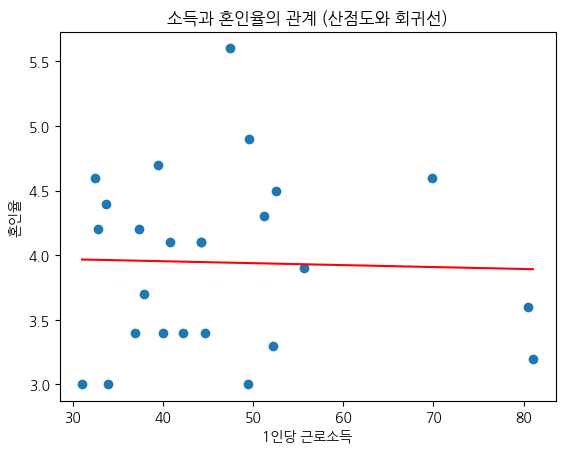

전체 데이터셋에서 소득과 혼인율 간에 유의한 상관관계가 없습니다.


In [216]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# 2021년 소득 데이터 파일 불러오기
df_income = pd.read_csv('구별_2021_1인당_근로소득.csv', encoding='utf-8')

# 2021년 혼인율 데이터 파일 불러오기
df_marriagerate = pd.read_csv('구별_조혼인율.csv', encoding='utf-8')

# 필요한 데이터만 추출 DataFrame 생성
df_merged = pd.merge(df_income, df_marriagerate, on='구이름')

# Rename the columns to valid variable names
df_merged = df_merged.rename(columns={'2021_x': 'income', '2021_y': 'marriagerate'})

# Run regression analysis
model = ols("marriagerate ~ 1 + income", data=df_merged).fit()

# 회귀분석 결과 출력하기
print("[전체 데이터셋의 회귀분석 결과]")
print(model.summary())

# Calculate correlation coefficient
correlation = df_merged['income'].corr(df_merged['marriagerate'])
print("전체 데이터셋에서의 상관계수: {:.3f}".format(correlation))

# Scatter plot with regression line
plt.scatter(df_merged['income'], df_merged['marriagerate'])
plt.xlabel('1인당 근로소득')
plt.ylabel('혼인율')
plt.title('소득과 혼인율의 관계 (산점도와 회귀선)')
plt.plot(df_merged['income'], model.predict(df_merged['income']), color='red')
plt.show()

# 유의수준 0.05 이하이면 유의하다고 판단
if model.pvalues['income'] < 0.05:
    print("전체 데이터셋에서 소득과 혼인율 간에 유의한 상관관계가 있습니다.")
else:
    print("전체 데이터셋에서 소득과 혼인율 간에 유의한 상관관계가 없습니다.")
